In [1]:
import torch
#!pip install facenet_pytorch
from facenet_pytorch import MTCNN
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'facenet_pytorch'

In [111]:
class FaceDetector:
    def __init__(self, weights_path, device=None):
        if device is None:
            self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        else:
            self.device = device
        self.model = MTCNN(keep_all=True, device=self.device)
        self.load_weights(weights_path)

    def load_weights(self, weights_path):
        # Загрузка весов в модель
        state_dict = torch.load(weights_path, map_location=self.device)
        self.model.load_state_dict(state_dict)

    def detect_faces(self, image_path):
        image = cv2.imread(image_path)
        boxes, _ = self.model.detect(image)
        boxes = boxes.astype(int)

        # Делаю padding
        boxes[:, 0] -= 10
        boxes[:, 1] -= 10
        boxes[:, 2] += 20
        boxes[:, 3] += 20

        return boxes

    def box_faces(self, image_path):
        boxes = self.detect_faces(image_path)
        img = cv2.imread(image_path)
        img = Image.fromarray(img.astype('uint8'), 'RGB')
        result = []

        for box in boxes:
            x_left, y_left = box[0], box[1]
            x_right, y_right = box[2], box[3]

            face_area = img.crop((x_left, y_left, x_right, y_right))
            face_area = np.array(face_area, dtype='uint8')
            result.append(face_area)

        return result

    def display_faces(self, image_path):
        image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
        boxes = self.detect_faces(image_path)
        image_np = np.array(image)

        fig, ax = plt.subplots()
        ax.imshow(image_np)

        if boxes is not None:
            for box in boxes:
                rect = plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], fill=False, color='red')
                ax.add_patch(rect)

        plt.axis('off')
        plt.show()

In [112]:
# Пример использования
weights_path = '/content/drive/MyDrive/test/test/mtcnn_weights.pth'
detector = FaceDetector(weights_path)

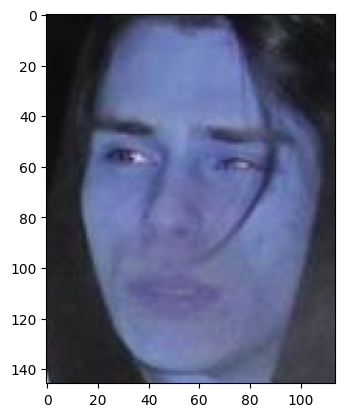

In [116]:
image_path = '/content/drive/MyDrive/test/123321.jpeg'
result = detector.box_faces(image_path)
plt.imshow(result[2])